# Ecuación de Schrödinger 
## El oscilador armónico cuántico

Queremos resolver la ecuación de Schrödinger independiente del tiempo
\begin{equation*}
\left[-\frac{1}{2}\nabla^2 + V(x)\right] \psi = E\psi\
\end{equation*}
donde estamos usando unidades naturales ya que son una buena elección para cálculos numéricos.
Y si definimos el Hamiltoniano como
\begin{equation*}
H = \left[-\frac{1}{2}\nabla^2 + V(x)\right] 
\end{equation*}
tenemos
\begin{equation*}
H \psi = E\psi\
\end{equation*}

en donde H es un operador diferencial que representa la energía total del sistema con las variables clásicas reformuladas como operadores diferenciales, y E son los valores eigen que resultarán de la solución a la ecuación diferencial. 

Para este caso, la ecuación de onda de Schrödinger independiente del tiempo para un cuerpo de masa m moviéndose dentro de un campo potencial V será:

El movimiento del cuerpo en el oscilador armónico simple es unidimensional, a lo largo de una coordenada que aquí identificaremos como el eje-$x$, el eje de las abcisas.   
En una dimensión, el operador $\nabla^2$ se reduce simplemente a $\partial^2/\partial x^2$ o lo que es lo mismo, en este caso unidimensional, $d^2/dx^2$.  
Por otra parte, la energía potencial en el oscilador armónico simple, según la ley de Hooke, es $V = kx^2/2$ , esta es una parábola que podemos graficar de la siguiente manera:


In [1]:
import numpy as np
import matplotlib.pyplot as plt             # Importamos matplotlib.pyplot como el alias plt

In [2]:
from numpy.polynomial import hermite as H

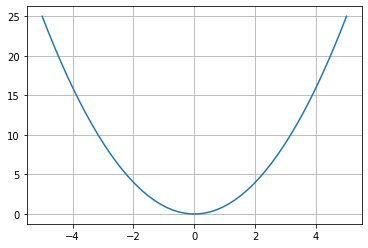

In [3]:
x = np.linspace(-5, 5)
plt.plot(x, x**2)
plt.grid()
plt.show()

reordenando la ecuacion y reemplazando el potencial, nos queda
\begin{equation*}
\frac{d^2\psi}{dx^2} + \frac{2\,m\,k}{2\,\hbar^2} x^2 \psi + \frac{2\, m\, E}{\hbar^2} \psi = 0
\end{equation*}

\begin{equation*}
\begin{split}
x &= \xi \sqrt{\frac{\hbar}{m \omega}} \\
E &= \hbar \omega \varepsilon \\
\omega &= \sqrt{\frac{k}{m}}
\end{split}
\end{equation*}
la ecuación de Schrödinger se transforma en otra más simple
\begin{equation*}
\boxed{\frac{d^2\psi(\xi)}{d\xi^2} + (2\varepsilon - \xi^2) \psi(\xi) = 0}
\end{equation*}


--------------------------------------------------
Haciendo un cambio de variable,
\begin{equation*}
\begin{split}
\psi(\xi) &= y(\xi) \exp\big(-\frac{\xi^2}{2}\big) \\
\frac{d\psi}{d\xi} &= \exp\big(-\frac{\xi^2}{2}\big) \frac{dy}{d\xi}- \xi \exp\big(-\frac{\xi^2}{2}\big) \\  
\frac{d^2\psi}{d\xi^2} &= \exp\big(-\frac{\xi^2}{2}\big) \frac{d^2y}{d\xi^2}- \xi \exp\big(-\frac{\xi^2}{2}\big) \frac{dy}{d\xi}-\exp\big(-\frac{\xi^2}{2}\big)y + \xi^2 \exp\big(-\frac{\xi^2}{2}\big) y -  \xi \exp\big(-\frac{\xi^2}{2}\big) \frac{dy}{d\xi} 
\end{split}
\end{equation*}

la ecuación diferencial se transforma en la de Hermite

--------------------------------------------------------
\begin{equation}
\boxed{\frac{d^2\psi(\xi)}{d\xi^2} -2 \xi \frac{d\psi}{d \xi} + (2\varepsilon - 1) \psi(\xi) = 0}
\end{equation}

Cuyas soluciones son los polinomios de `Hermite`
\begin{equation}
\begin{aligned}
2\varepsilon-1 &= 2n \\ 
\varepsilon &= n+\frac{1}{2} \\ 
n &= 0,1,2,3,...
\end{aligned}
\end{equation}

> **Unidades de Planck**   
Las unidades de Planck **o unidades naturales** son un sistema de unidades propuesto por primera vez en 1899 por Max Planck. El sistema mide varias de las magnitudes fundamentales del universo: tiempo, longitud, masa, carga eléctrica y temperatura.  

> **El sistema se define haciendo que las cinco constantes físicas universales de la tabla `tomen el valor 1` cuando se expresen ecuaciones y cálculos en dicho sistema**. 


<center><img src="UnidadesNaturales.png" width="660" height="330"/></center>

> El uso de este sistema de unidades trae consigo varias ventajas. La primera y más obvia es que simplifica mucho la estructura de las ecuaciones físicas porque elimina las constantes de proporcionalidad y hace que los resultados de las ecuaciones no dependan del valor de las constantes.  
Por otra parte, se pueden comparar mucho más fácilmente las magnitudes de distintas unidades. 


In [4]:
x = np.linspace(-4,4, 21)
n = 2
poliH = H.Hermite.basis(n)
print(poliH(x))

[62.   49.84 38.96 29.36 21.04 14.    8.24  3.76  0.56 -1.36 -2.   -1.36
  0.56  3.76  8.24 14.   21.04 29.36 38.96 49.84 62.  ]


Text(0.5, 1.0, 'Oscilador armónico cuántico')

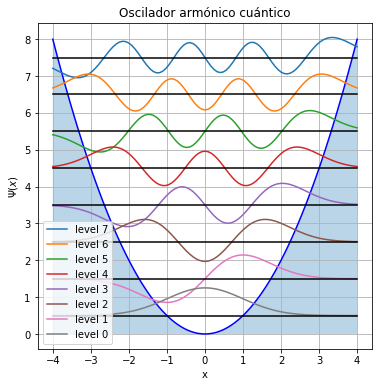

In [6]:
plt.figure(figsize=(6.0, 6.0))

x = np.linspace(-4,4,101)
y = x**2/2.0

plt.plot(x,y,'b')
plt.fill_between(x, y, alpha=0.3)
for n in range(7, -1, -1):
    yh = n + 0.5+H.Hermite.basis(n)(x)*np.exp(-x**2/2.0)/np.sqrt(2**n*np.sqrt(np.pi)*np.math.factorial(n))
    plt.plot(x, yh, label='level '+str(n)) 
    plt.plot([-4, 4],[n+0.5, n+0.5],'-k', )
plt.legend(loc = 3)
plt.grid()
plt.xlabel('x')
plt.ylabel('$\Psi(x)$')
plt.title('Oscilador armónico cuántico')